<a href="https://colab.research.google.com/github/vi-xoxo/DIF62130_B_25_2311533010/blob/main/Praktikum1/LINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

In [2]:

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()                              # Mengambil dataset harga rumah di California.
df = pd.DataFrame(housing.data, columns=housing.feature_names)    # Mengubah data dari format NumPy array menjadi tabel DataFrame.
df['MedHouseValue'] = pd.Series(housing.target)                   # Menambahkan kolom target ke dalam DataFrame.

targets=df['MedHouseValue']                 #Dependent variable
inputs=df.drop(['MedHouseValue'],axis=1)    #Indenpedent variable
df.head()                                   #Menampilkan 5 data teratas

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


df.describe() : Menampilkan ringkasan statistik setiap kolom.

df.info() : Menampilkan tipe data dan jumlah missing values.

df.shape : Menampilkan ukuran DataFrame (baris, kolom).

In [3]:
# df.describe()
# df.info()
print('DataFrame dimension: ', df.shape)

DataFrame dimension:  (20640, 9)


In [4]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.3, random_state=1)
# inputs :Variabel independen (fitur) dari dataset (df.drop(['MedHouseValue'], axis=1)).
# targets : Variabel dependen (label) (df['MedHouseValue']).
# test_size=0.3 : 30% data digunakan untuk testing, 70% untuk training.
# random_state=1 : Agar hasil pembagian data selalu sama setiap kali dijalankan.
print(x_train.shape, x_test.shape)  # mencetak jumlah baris dan kolom dari data training & testing.
print(y_train.shape, y_test.shape)

(14448, 8) (6192, 8)
(14448,) (6192,)


In [5]:
scaler = MinMaxScaler()                 # Membuat objek MinMaxScaler.
x_train = scaler.fit_transform(x_train) # menghitung nilai minimum & maksimum dari x_train, lalu menormalisasi datanya.
x_test = scaler.transform(x_test)       # mengubah x_test menggunakan skala yang sama dari x_train (agar konsisten).
print(x_test)                           # Menampilkan data x_test yang telah dinormalisasi.

[[1.89659453e-01 7.45098039e-01 2.59249620e-02 ... 8.26699958e-04
  1.61530287e-01 5.94594595e-01]
 [1.01964111e-01 7.05882353e-01 2.93658328e-02 ... 1.49655077e-03
  4.50584485e-01 4.52452452e-01]
 [2.42293210e-01 8.82352941e-01 2.57625553e-02 ... 2.43712035e-03
  5.51540914e-01 1.88188188e-01]
 ...
 [1.43901463e-01 9.01960784e-01 2.71911561e-02 ... 1.63065424e-03
  5.92986185e-01 2.05205205e-01]
 [1.45508338e-01 2.35294118e-01 2.97484189e-02 ... 1.59782455e-03
  5.87672689e-01 2.06206206e-01]
 [8.33367816e-02 5.49019608e-01 1.45501245e-02 ... 1.74904890e-03
  1.65781084e-01 6.00600601e-01]]


In [6]:
lr_model = LinearRegression()                   # Membuat model regresi linear dengan LinearRegression() dari sklearn.linear_model.
lr_model.fit(x_train, y_train)                  # Melatih model regresi linear menggunakan data pelatihan (x_train sebagai fitur, y_train sebagai target).


print(f'intercept : {lr_model.intercept_}')     # Mencetak intercept (nilai bias b dalam persamaan regresi linear).
print(f'slope : {lr_model.coef_}')              # Mencetak slope/koefisien (kemiringan m untuk setiap fitur dalam persamaan regresi linear).


intercept : 3.721516132506502
slope : [  6.39513914   0.49408893 -14.78075919  20.98391128  -0.2003207
  -4.08551937  -3.98214561  -4.37460957]


MSE : 0.5296293151408232
R2 : 0.597142973735963


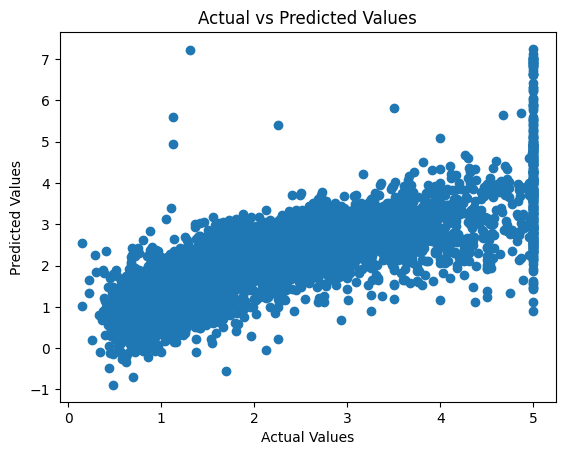

In [7]:
y_pred = lr_model.predict(x_test)           # hasil prediksi model pada data uji (x_test).
mse=mean_squared_error(y_test, y_pred)      # mengukur rata-rata kesalahan kuadrat antara nilai aktual (y_test) dan nilai prediksi (y_pred).
r2=lr_model.score(x_test, y_test)           # mengukur seberapa baik model menjelaskan variasi dalam data.
print(f'MSE : {mse}')                       # Menampilkan nilai MSE dan R² sebagai hasil evaluasi model.
print(f'R2 : {r2}')                         # Menampilkan nilai MSE dan R² sebagai hasil evaluasi model.

plt.scatter(y_test, y_pred)                 # Membuat scatter plot antara nilai aktual dan prediksi.
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()                                  # Menampilkan grafik scatter plot antara nilai aktual dan prediksi.
